# Exploratory Data Analysis - Task 3 - Case Yara

## Question: 
> The VP of Commercial Excellence Americas, the loyalty program’s sponsor, requested the analytics team to evaluate the program’s success by comparing loyalty to non-loyalty farmers. Are loyalty users different from regular users in relation to the main KPIs, app utilization and churn? Another important aspect is to understand if there are any BUs being more successful in acquiring and maintaining users in our digital tools. Create a 10-15 min presentation, bearing in mind she is not familiarized with technical data analysis terms. Please feel free to suggest data driven action plans. 

### KPIs to keep in mind
- **Active users**: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned. 
- **Active fields**: non-archived fields belonging to active users. 
- **Active hectares**: field area belonging to active fields. 

### Steps to follow in the analysis
1. [Data Preparation:](#1.-Data-Preparation) 
   1. Load Dataset to Pandas;
   2. Clean the data by handling missing values, inconsistencies or outliers, if necessary;
   3. Create a new column to identify active users;
2. [Compare Loyalty vs. Non-Loyalty users:](#2.-Compare-Loyalty-vs.-Non-Loyalty-users)
   1. Split the dataset into loyalty users and non-loyalty users based on the loyalty column;
   2. Calculate and compare the main KPIs (active users, active fields, active hectares) between loyalty users and non-loyalty users;
3. [Analyze app utilization:](#3.-Analyze-app-utilization)
   1. Split the dataset for loyalty users and non-loyalty users;
   2. Calculate and compare the average utilization of these app features between the two user groups;
4. [Analyze churn:](#4.-Analyze-churn)
   1. Identify churned users using the active users column created;
   2. Calculate the churn rate for loyalty users and non-loyalty users;
   3. Compare the churn rates between the two user groups;
   4. Consider using additional factors like user engagement metrics to understand the reasons for churn;
5. [Evaluate Business Unit Performance:](#5.-Evaluate-Business-Unit-Performance)
   1. Group the data by Business Unit using the `bu_name` column;
   2. Calculate the number of active users, active fields, and active hectares for each BU;
   3. Identify the BUs that have the highest acquisition and retention rates of users in the digital tools;
6. [Summarize and Present Findings:](#6.-Summarize-and-Present-Findings)
   1. Summarize the key findings and insights from the analysis;



## 1. Data Preparation

In [335]:
import pandas as pd
import sys 
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../python/function')
from data_cleaning_and_processing import data_cleaning_and_processing
# Set the float format option
pd.options.display.float_format = '{:.2f}'.format

# Set option for pandas to display all the columns
pd.set_option('display.max_columns', None)

# set configurations for searborn 
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5.27)})

### 1.1. Load Dataset to Pandas

In [336]:
# Load the dataset
case_dataset = data_cleaning_and_processing.prepare_dataset(r"../dataset_provided/agtech_use_case.csv")
case_dataset = case_dataset.loc[case_dataset.user_type == 'farmer']
case_dataset

,id,user_type,bu_name,loyalty,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,main_crop,state,region
0,1,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
1,5,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
2,6,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
3,7,farmer,NaN,False,2023-07-06,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
4,14,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,112566,farmer,NaN,False,2021-09-02,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12758,112600,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,1,1,1,171.50,171.50,NaN,NaN,NaN
12759,112609,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12762,112637,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN


### 1.2. Clean the data by handling missing values, inconsistencies or outliers, if necessary

#### Data cleaning steps already performed:
- replaced all occurrences of the dot character `.` with the forward slash character `/` in the `user_reg_date` and `last_event_date`
- converted the values in the `user_reg_date`, `last_event_date`, `recommendation_generated_last_date`, `map_created_last_date`, `monitoring_last_date`, `field_exploring_last_date` columns from a _string_ format to a _datetime_ format
- replaced specific values in the `user_type` column of the `case_dataset` DataFrame
- applied a lambda function to the `loyalty` column of the `case_dataset` DataFrame. If the cell contains `YES`, it is `TRUE`, otherwise it is `FALSE`
- removed any leading whitespace from the values in the `main_crop` column


In [337]:
case_describe = case_dataset.describe()
case_describe

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,9563.00,9563,9563,9563.00,44.00,44,267.00,267,215.00,1180.00,1180,622.00,1222.00,1222,672.00,9563.00,9563.00,9563.00,9563.00,2959.00
mean,50636.30,2022-07-11 03:26:35.775384320,2022-08-16 04:17:47.614765056,326.82,1.70,2022-09-23 04:54:32.727272704,3.47,2022-10-06 00:43:08.764045056,2.80,38.82,2022-07-03 00:57:21.355932160,43.40,22.37,2022-07-15 13:42:31.227495936,25.73,138.13,2.20,0.40,6589.19,22757.92
min,1.00,2019-02-05 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-09 00:00:00,1.00,1.00,2021-04-14 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,25210.50,2021-12-31 00:00:00,2022-02-01 00:00:00,109.00,1.00,2022-07-04 12:00:00,1.00,2022-07-18 00:00:00,1.00,2.00,2022-01-09 00:00:00,3.00,2.00,2022-02-01 06:00:00,2.00,0.00,0.00,0.00,0.00,0.72
50%,49569.00,2022-06-30 00:00:00,2022-08-07 00:00:00,336.00,1.00,2022-08-20 12:00:00,2.00,2022-08-30 00:00:00,1.00,7.00,2022-07-19 12:00:00,8.00,4.00,2022-07-26 00:00:00,7.00,0.00,0.00,0.00,0.00,8.59
75%,75141.00,2023-02-10 00:00:00,2023-03-22 00:00:00,523.00,2.00,2022-12-18 06:00:00,3.00,2023-01-08 00:00:00,2.00,22.00,2022-12-12 00:00:00,28.00,16.00,2022-11-20 18:00:00,23.00,1.00,1.00,1.00,0.23,143.27
max,112711.00,2023-07-08 00:00:00,2023-07-08 00:00:00,670.00,7.00,2023-07-01 00:00:00,88.00,2023-07-08 00:00:00,88.00,5378.00,2023-07-08 00:00:00,5151.00,1084.00,2023-07-08 00:00:00,683.00,458542.00,1682.00,38.00,16471966.99,16471966.99
std,30077.60,NaN,NaN,214.06,1.37,NaN,7.88,NaN,6.94,194.10,NaN,224.82,62.65,NaN,62.06,5171.10,25.21,1.19,209552.40,383820.58


##### Findings|

In [338]:
print('1. There are {:,.0f} lines in the dataset'.format(case_describe[(case_describe.index == 'count')]['id'].sum()))
print('2. The first user registered was {} and the last one was {}'.format(case_describe[(case_describe.index == 'min')]['user_reg_date'].sum(), case_describe[(case_describe.index == 'max')]['user_reg_date'].sum()))
print('3. The first last event date was {} and the most recent event date was {}'.format(case_describe[(case_describe.index == 'min')]['last_event_date'].sum(), case_describe[(case_describe.index == 'max')]['last_event_date'].sum()))
print('4. The first last recommendation was {} and the last recommendation was {}'.format(case_describe[(case_describe.index == 'min')]['recommendation_generated_last_date'].sum(), case_describe[(case_describe.index == 'max')]['recommendation_generated_last_date'].sum()))
print('5. The first last map created was {} and the last map created was {}'.format(case_describe[(case_describe.index == 'min')]['map_created_last_date'].sum(), case_describe[(case_describe.index == 'max')]['map_created_last_date'].sum()))
print('6. The average number of maps created in the last 365 days is {:,.1f}, with the median {:,.1f}'.format(case_describe[(case_describe.index == 'mean')]['map_created_last365days'].sum(), case_describe[(case_describe.index == '50%')]['map_created_last365days'].sum()))
print('7. The average monitoring events is {:,.1f}, minimum is 1 and maximum is {:,.0f}.'.format(case_describe[(case_describe.index == 'mean')]['monitoring_events'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_events'].sum()))
print('8. The first monitoring event last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['monitoring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last_date'].sum()))
print('9. The average of monitoring events in the last 365 days is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last365days'].sum()))
print('10. The field exploring events average is {:,.2f}, with minimum {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_events'].sum()))
print('11. The first field exploring last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['field_exploring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last_date'].sum()))
print('12. The field exploring in the last 365 days average is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last365days'].sum()))
print('13. The average of active fields is {:,.2f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_active_fields'].sum()))
print('14. The average number of fields is {:,.1f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_fields'].sum()))
print('15. The average number of farms is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_farms'].sum(), case_describe[(case_describe.index == 'max')]['n_farms'].sum()))
print('16. The average total active field area is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['total_active_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_active_field_area'].sum()))
print('17. The average total field area is {:,.2f} and maximum is {:,.2f}'.format(case_describe[(case_describe.index == 'mean')]['total_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_field_area'].sum()))
print("18. There are {} duplicates in id".format(case_dataset['id'].duplicated().sum()))
print("19. There are {} business units names available for {} lines. There others are empty".format(case_dataset['bu_name'].drop_duplicates().dropna().count(), case_dataset['bu_name'].dropna().count()))
print("20. There are {} loyalty users and {} are non-loyalty users".format(case_dataset.loc[case_dataset.loyalty == True, 'loyalty'].count(), case_dataset.loc[case_dataset.loyalty == False, 'loyalty'].count()))
print("21. Only the loyalty users has business units associated with them")
print("22. There are {:,.0f} lines with state filled and {:,.0f} with region filled. Only {:,.0f} region is filled and doesn't have the state filled.".format(case_dataset.loc[(case_dataset.state.isna() == False), 'state'].count(), case_dataset.loc[(case_dataset.region.isna() == False), 'region'].count(), case_dataset.loc[(case_dataset.state.isna() == True) & (case_dataset.region.isna() == False), 'region'].drop_duplicates().count()))

1. There are 9,563 lines in the dataset
2. The first user registered was 2019-02-05 00:00:00 and the last one was 2023-07-08 00:00:00
3. The first last event date was 2021-09-07 00:00:00 and the most recent event date was 2023-07-08 00:00:00
4. The first last recommendation was 2021-10-21 00:00:00 and the last recommendation was 2023-07-01 00:00:00
5. The first last map created was 2021-04-15 00:00:00 and the last map created was 2023-07-08 00:00:00
6. The average number of maps created in the last 365 days is 2.8, with the median 1.0
7. The average monitoring events is 38.8, minimum is 1 and maximum is 5,378.
8. The first monitoring event last date was 2019-08-09 00:00:00 and the last was 2023-07-08 00:00:00
9. The average of monitoring events in the last 365 days is 43.40, minimum is 1 and maximum is 5,151
10. The field exploring events average is 22.37, with minimum 1 and maximum 1,084
11. The first field exploring last date was 2021-04-14 00:00:00 and the last was 2023-07-08 00:00:

#### Cleaning by removing outliers and inconsistencies from the data

##### monitoring_events

In [339]:
# copying the dataset for historical reasons
case_dataset_clean = case_dataset.copy()

# filter only filled monitoring events
case_monitoring_events_view = case_dataset_clean.loc[case_dataset_clean.monitoring_events.isna() == False, ['monitoring_events']]

# create bins for each range of monitoring events
bins = np.arange(0, case_monitoring_events_view.monitoring_events.max() + 537,537)
case_monitoring_events_view['groups'] = pd.cut(case_monitoring_events_view['monitoring_events'], bins)

print('By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.\n')
# view the data grouped by bins 
print(case_monitoring_events_view[['groups', 'monitoring_events']].groupby('groups').count().reset_index())

# adding to the dataset only the data where the monitoring_events column has the value < 2148 or is null 
case_dataset_clean = case_dataset_clean.loc[(case_dataset_clean.monitoring_events < 2148) | (case_dataset_clean.monitoring_events.isna() == True)]

By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.

              groups  monitoring_events
0       (0.0, 537.0]               1170
1    (537.0, 1074.0]                  6
2   (1074.0, 1611.0]                  1
3   (1611.0, 2148.0]                  2
4   (2148.0, 2685.0]                  0
5   (2685.0, 3222.0]                  0
6   (3222.0, 3759.0]                  0
7   (3759.0, 4296.0]                  0
8   (4296.0, 4833.0]                  0
9   (4833.0, 5370.0]                  0
10  (5370.0, 5907.0]                  1


##### monitoring_last365days

There is nothing to be cleaned in the column monitoring_last365days.


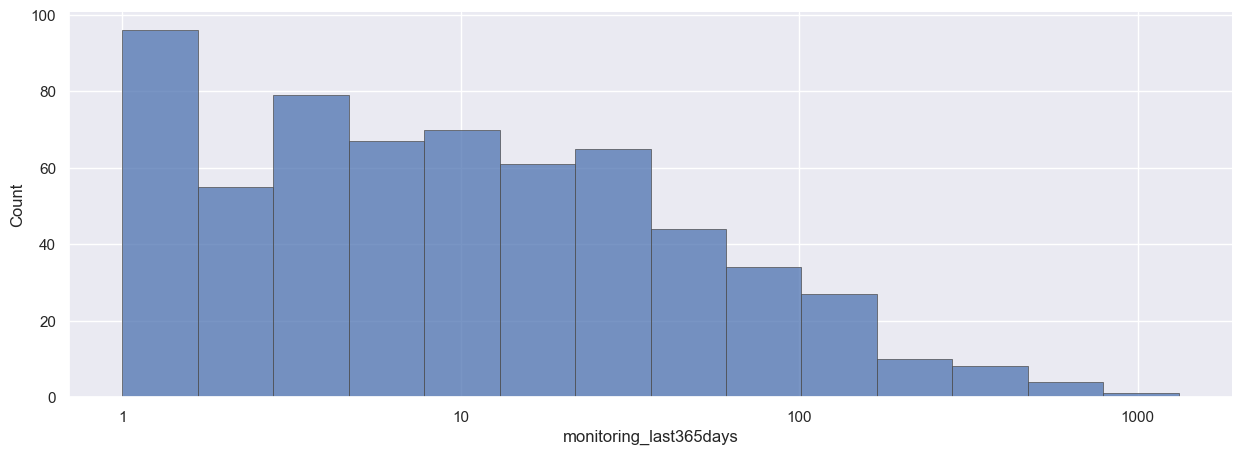

In [340]:
# filter only filled monitoring events
case_monitoring_last365days_view = case_dataset_clean.loc[case_dataset_clean.monitoring_last365days.isna() == False, ['monitoring_last365days']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_monitoring_last365days_view,
    x="monitoring_last365days", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column monitoring_last365days.")

##### field_exploring_events

There is nothing to be cleaned in the column field_exploring_events.


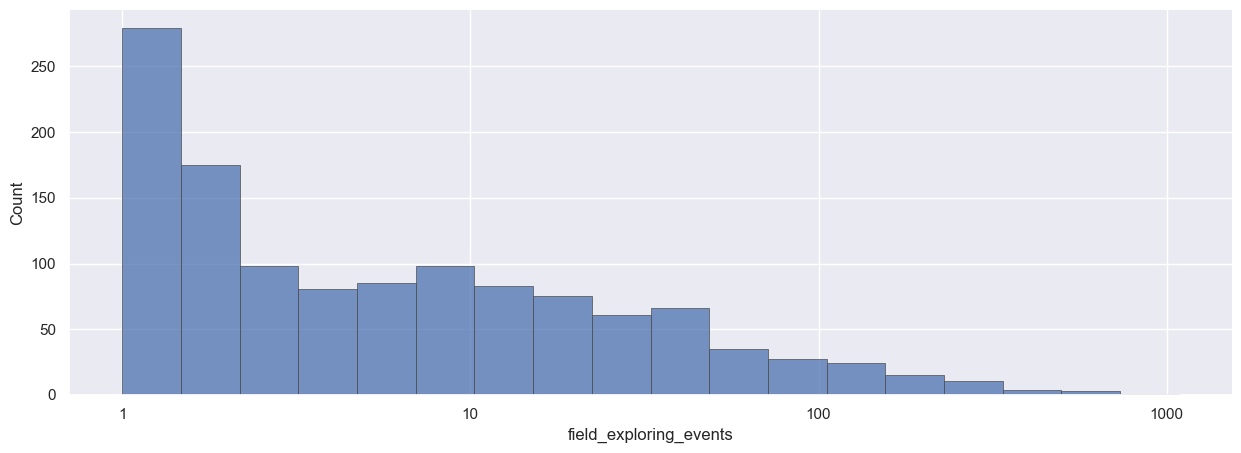

In [341]:
# filter only filled monitoring events
case_field_exploring_events_view = case_dataset_clean.loc[case_dataset_clean.field_exploring_events.isna() == False, ['field_exploring_events']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_field_exploring_events_view,
    x="field_exploring_events", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column field_exploring_events.")

##### n_active_fields

In the boxplot is easy to identify a really large number of outliers. This plot contains 9562 data points.


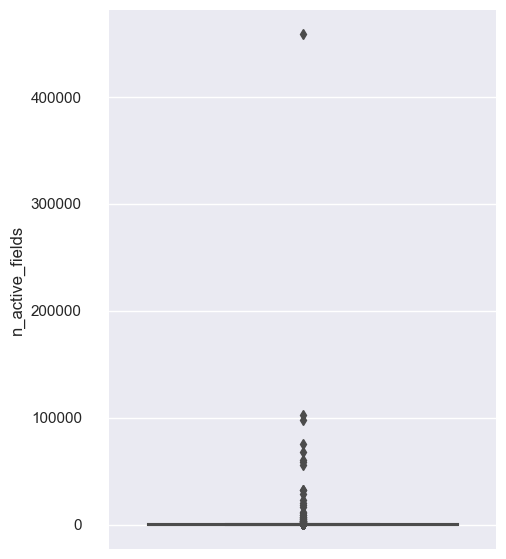

In [342]:
# filter only filled n_active_fields
case_n_active_fields_view = case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, ['n_active_fields']]

# configure the figure size
sns.set(rc={'figure.figsize':(5,7)})

# plot the boxplot for visualization
sns.boxplot(y="n_active_fields",
            data=case_n_active_fields_view)

sns.despine(offset=10, trim=True)

print('In the boxplot is easy to identify a really large number of outliers. This plot contains {} data points.'.format(case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, 'n_active_fields'].count()))

We can see that now the data is closer to each other and we can continue using this data. Removed 22 outliers, so this plot contains 9540 data points.


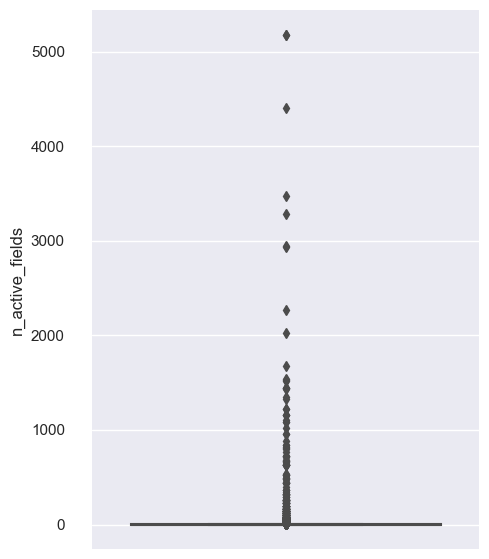

In [343]:
# get mean and standard deviation
mean_value = case_n_active_fields_view['n_active_fields'].mean()
std_value = case_n_active_fields_view['n_active_fields'].std()

# Define outlier threshold as 1 to mitigate the influence of extreme values on the overall distribution
threshold = 1   

# Identify outliers by comparing the absolute difference of each value in the 'n_active_fields' column to the mean with a threshold based on the standard deviation.
outlier_mask = abs(case_n_active_fields_view['n_active_fields'] - mean_value) > (threshold * std_value)

# Remove outliers
df_filtered = case_n_active_fields_view[~outlier_mask]

# Print the filtered DataFrame without outliers
sns.boxplot(y="n_active_fields",
            data=df_filtered)

sns.despine(offset=10, trim=True)

# explanation of what was done and 
print('We can see that now the data is closer to each other and we can continue using this data. Removed {} outliers, so this plot contains {} data points.'.format(case_n_active_fields_view.loc[outlier_mask, 'n_active_fields'].count(), df_filtered['n_active_fields'].count()))

case_dataset_clean = case_dataset_clean[~outlier_mask]

##### n_fields / total_field_area / recommendation_generated / map_created / map_created_last365days / monitoring_events / monitoring_last365days / field_exploring_events / field_exploring_last365days

In [344]:
# fill missing values
case_dataset_clean['n_fields'] = case_dataset_clean['n_fields'].fillna(0)
case_dataset_clean['total_field_area'] = case_dataset_clean['total_field_area'].fillna(0.0)
case_dataset_clean['recommendation_generated'] = case_dataset_clean['recommendation_generated'].fillna(0.0).astype(int)
case_dataset_clean['map_created'] = case_dataset_clean['map_created'].fillna(0.0).astype(int)
case_dataset_clean['map_created_last365days'] = case_dataset_clean['map_created_last365days'].fillna(0.0).astype(int)
case_dataset_clean['monitoring_events'] = case_dataset_clean['monitoring_last365days'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_events'] = case_dataset_clean['field_exploring_events'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_last365days'] = case_dataset_clean['field_exploring_last365days'].fillna(0.0).astype(int)

##### total_n_fields

During the analysis, it was identified that the numbers contained in the columns `n_active_fields` and `n_fields` should be added together. It is understood that the column `n_fields` is the total of fields, but as it is smaller than the total of active fields, this information means that the column only contains the total of fields that are not active, therefore, it is necessary to do the sum of the columns to capture the total of fields available to the user.

In [345]:
case_dataset_clean['total_n_fields'] = case_dataset_clean.n_active_fields + case_dataset_clean.n_fields

#### region

In [346]:
case_dataset_clean = case_dataset_clean.loc[(~case_dataset_clean.region.isin(['Cantabria','Veracruz']))]

### 1.3 Create a new column to identify active users

In [347]:
# Calculate the current date for churn calculation
current_date = pd.to_datetime('today')

# copy the dataset clean to a new variable to keep historical data
case_dataset_prepared = case_dataset_clean.copy()

### Active users: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned.
# Calculate active users by creating a column called active_users, where users that are active receives true, otherwise false.
case_dataset_prepared.loc[case_dataset_prepared['last_event_date'] >= current_date - pd.DateOffset(years=1), 'active_users'] = True
case_dataset_prepared.loc[case_dataset_prepared.active_users.isna(), 'active_users'] = False

# 2. Compare Loyalty vs. Non-Loyalty users

## 2.1 Split the dataset into loyalty users and non-loyalty users based on the loyalty column

In [350]:
case_dataset_prepared.loc[(case_dataset_prepared.active_users == True), 'id'].count() # 5036
case_dataset_prepared.loc[(case_dataset_prepared.active_users == True) & (case_dataset_prepared.loyalty == True), 'id'].count() # 406

406

In [316]:
nonloyalty = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == False)]
loyalty = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == True)]

print(f"""The size of the dataset for Loyalty users is {loyalty['id'].count():,} and for non-loyalty users is {nonloyalty['id'].count():,}.

### Total number of Loyalty users compared to non-loyalty users
Loyalty users are {((loyalty['id'].count() / (loyalty['id'].count() + nonloyalty['id'].count())) * 100):.2f}% of the total number of users.

### Total number of Loyalty active users compared to non-loyalty active users
Loyalty active users are {((loyalty.loc[loyalty.active_users == True, 'id'].count() / (loyalty.loc[loyalty.active_users == True, 'id'].count() + nonloyalty.loc[nonloyalty.active_users == True, 'id'].count())) * 100):.2f}% of the total number of users.

### Total number of active fields from Loyalty users to non-loyalty users
Loyalty users have {loyalty.loc[loyalty.n_active_fields.isna() == False, 'n_active_fields'].sum():,.0f} active fields, which is {((loyalty.loc[loyalty.n_active_fields.isna() == False, 'n_active_fields'].sum() / loyalty['total_n_fields'].sum()) * 100):,.2f}% of the total number of fields.
Loyalty active users have {loyalty.loc[(loyalty.n_active_fields.isna() == False) & (loyalty.active_users == True), 'n_active_fields'].sum():,.0f} active fields, which is {((loyalty.loc[(loyalty.n_active_fields.isna() == False) & (loyalty.active_users == True), 'n_active_fields'].sum() / loyalty.loc[(loyalty.active_users == True), 'total_n_fields'].sum()) * 100):,.2f}% of the total number of fields.
Non-Loyalty users, on the other hand, have {nonloyalty.loc[nonloyalty.n_active_fields.isna() == False, 'n_active_fields'].sum():,.0f} active fields, which is {((nonloyalty.loc[nonloyalty.n_active_fields.isna() == False, 'n_active_fields'].sum() / nonloyalty['total_n_fields'].sum()) * 100):,.2f}% of the total number of fields.
Non-Loyalty active users have {nonloyalty.loc[(nonloyalty.n_active_fields.isna() == False) & (nonloyalty.active_users == True), 'n_active_fields'].sum():,.0f} active fields, which is {((nonloyalty.loc[(nonloyalty.n_active_fields.isna() == False) & (nonloyalty.active_users == True), 'n_active_fields'].sum() / nonloyalty.loc[(nonloyalty.active_users == True), 'total_n_fields'].sum()) * 100):,.2f}% of the total number of fields.

Loyalty members have {((loyalty.loc[loyalty.n_active_fields.isna() == False, 'n_active_fields'].sum() / loyalty['total_n_fields'].sum()) * 100) - ((nonloyalty.loc[nonloyalty.n_active_fields.isna() == False, 'n_active_fields'].sum() / nonloyalty['total_n_fields'].sum()) * 100):,.2f}% more active fields compared to Non-Loyalty members.
Loyalty active members have {((loyalty.loc[(loyalty.n_active_fields.isna() == False) & (loyalty.active_users == True), 'n_active_fields'].sum() / loyalty.loc[(loyalty.active_users == True), 'total_n_fields'].sum()) * 100) - ((nonloyalty.loc[(nonloyalty.n_active_fields.isna() == False) & (nonloyalty.active_users == True), 'n_active_fields'].sum() / nonloyalty.loc[(nonloyalty.active_users == True), 'total_n_fields'].sum()) * 100):,.2f}% more active fields compared to Non-Loyalty active members.

### Total of active hectares from Loyalty users to Non-Loyalty users
Loyalty users have {loyalty['total_active_field_area'].sum():,.0f} active hectares, which is {((loyalty['total_active_field_area'].sum() / loyalty['total_field_area'].sum()) * 100):,.2f}% of the total hectares for loyalty members.
Loyalty active users have {loyalty.loc[(loyalty.active_users == True),'total_active_field_area'].sum():,.0f} active hectares, which is {((loyalty.loc[(loyalty.active_users == True), 'total_active_field_area'].sum() / loyalty.loc[(loyalty.active_users == True), 'total_field_area'].sum()) * 100):,.2f}% of the total hectares for loyalty members.
Non-Loyalty users, on the other hand, have {nonloyalty['total_active_field_area'].sum():,.0f} active hectares, which is {((nonloyalty['total_active_field_area'].sum() / nonloyalty['total_field_area'].sum()) * 100):,.2f}% of the total number of fields.
Non-Loyalty active users have {nonloyalty.loc[(nonloyalty.active_users == True), 'total_active_field_area'].sum():,.0f} active hectares, which is {((nonloyalty.loc[(nonloyalty.active_users == True), 'total_active_field_area'].sum() / nonloyalty.loc[(nonloyalty.active_users == True), 'total_field_area'].sum()) * 100):,.2f}% of the total number of fields.

Loyalty members have {((loyalty['total_active_field_area'].sum() / loyalty['total_field_area'].sum()) * 100) - ((nonloyalty['total_active_field_area'].sum() / nonloyalty['total_field_area'].sum()) * 100):,.2f}% more active hectares compared to Non-Loyalty members.
      """)


The size of the dataset for Loyalty users is 524 and for non-loyalty users is 9,014.

### Total number of Loyalty users compared to non-loyalty users
Loyalty users are 5.49% of the total number of users.

### Total number of Loyalty active users compared to non-loyalty active users
Loyalty active users are 8.06% of the total number of users.

### Total number of active fields from Loyalty users to non-loyalty users
Loyalty users have 100,923 active fields, which is 90.91% of the total number of fields.
Loyalty active users have 96,798 active fields, which is 91.80% of the total number of fields.
Non-Loyalty users, on the other hand, have 13,173 active fields, which is 75.11% of the total number of fields.
Non-Loyalty active users have 11,283 active fields, which is 81.67% of the total number of fields.

Loyalty members have 15.80% more active fields compared to Non-Loyalty members.
Loyalty active members have 10.13% more active fields compared to Non-Loyalty active members.

### Total 

# 3. Analyze app utilization

### Split the dataset for loyalty users and non-loyalty users

In [317]:
# split the data into two datasets with specific columns
loyalty_app = loyalty[['id', 'recommendation_generated', 'recommendation_generated_last_date', 'map_created', 'map_created_last_date', 'map_created_last365days', 'monitoring_events', 'monitoring_last_date', 'monitoring_last365days', 'field_exploring_events','field_exploring_last_date', 'field_exploring_last365days', 'state', 'region', 'main_crop', 'active_users']]
nonloyalty_app = nonloyalty[['id', 'recommendation_generated', 'recommendation_generated_last_date', 'map_created', 'map_created_last_date', 'map_created_last365days', 'monitoring_events', 'monitoring_last_date', 'monitoring_last365days', 'field_exploring_events','field_exploring_last_date', 'field_exploring_last365days', 'state', 'region', 'main_crop', 'active_users']]

##### Calculate the overall app utilization and feature specific for active users 

In [318]:
# Calculate overall app utilization
loyalty_total_events = loyalty_app.loc[(loyalty_app.active_users == True), ['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']].sum().sum()
nonloyalty_total_events = nonloyalty_app.loc[(nonloyalty_app.active_users == True),['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']].sum().sum() 

# Calculate feature-specific utilization
loyalty_feature_utilization = loyalty_app.loc[(loyalty_app.active_users == True),['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']].mean()
nonloyalty_feature_utilization = nonloyalty_app.loc[(nonloyalty_app.active_users == True),['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']].mean()

# Print the results
print("Overall App Utilization:")
print("Loyalty Users Total Events:", loyalty_total_events)
print("Non-loyalty Users Total Events:", nonloyalty_total_events) 

print("\nFeature-Specific Utilization:")
print("Loyalty Users Feature Utilization:")
print(loyalty_feature_utilization)
print("\nNon-loyalty Users Feature Utilization:")
print(nonloyalty_feature_utilization)

Overall App Utilization:
Loyalty Users Total Events: 30039
Non-loyalty Users Total Events: 12759

Feature-Specific Utilization:
Loyalty Users Feature Utilization:
recommendation_generated    0.12
map_created                 1.61
monitoring_events          34.28
field_exploring_events     37.98
dtype: float64

Non-loyalty Users Feature Utilization:
recommendation_generated   0.00
map_created                0.05
monitoring_events          1.54
field_exploring_events     1.17
dtype: float64


##### Analyze the data through chart

<Figure size 1000x600 with 0 Axes>

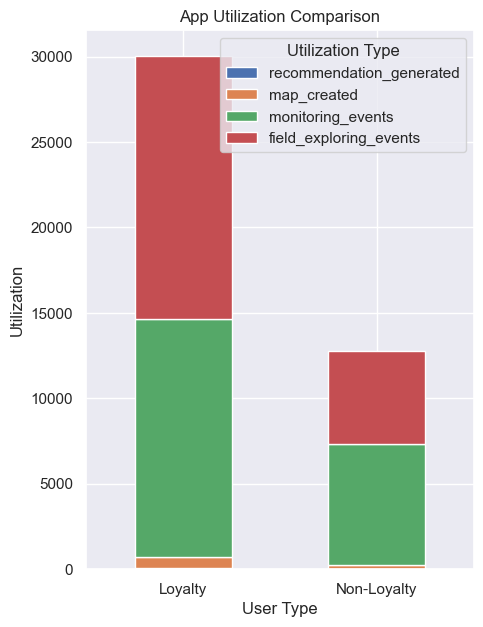

In [319]:
# Merge the datasets and create a new column 'utilization_type'
loyalty_app['user_type'] = 'Loyalty'
nonloyalty_app['user_type'] = 'Non-Loyalty'
combined_data = pd.concat([loyalty_app.loc[(loyalty_app.active_users == True)], nonloyalty_app.loc[(nonloyalty_app.active_users == True)]])
combined_data = combined_data.rename(columns={'monitoring_last_date': 'monitoring_events_last_date', 'field_exploring_last_date':'field_exploring_events_last_date'})

# Create a new DataFrame for stacked bar chart
utilization_cols = ['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']
sum_data = combined_data.groupby('user_type')[utilization_cols].sum()

# Plot the comparison using a stacked bar chart
plt.figure(figsize=(10, 6))
sum_data.plot(kind='bar', stacked=True)
plt.title('App Utilization Comparison')
plt.xlabel('User Type')
plt.ylabel('Utilization')
plt.xticks(rotation=0)
plt.legend(title='Utilization Type')
plt.show()

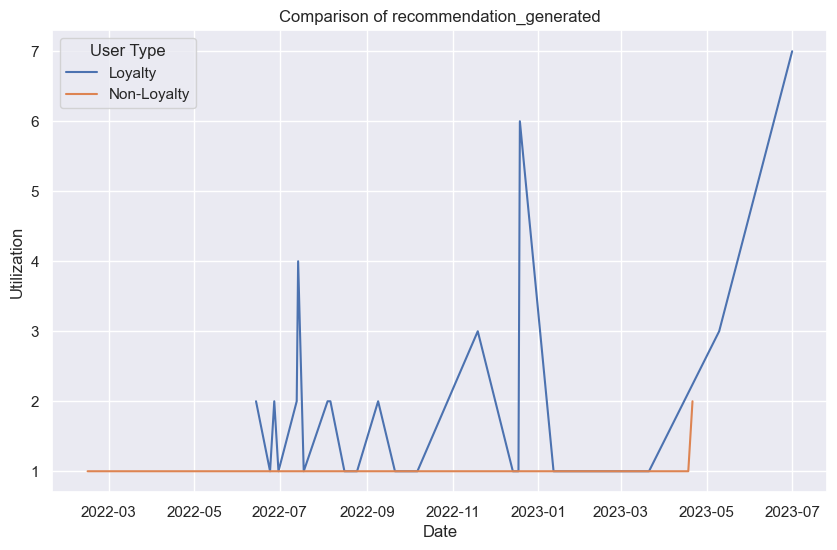

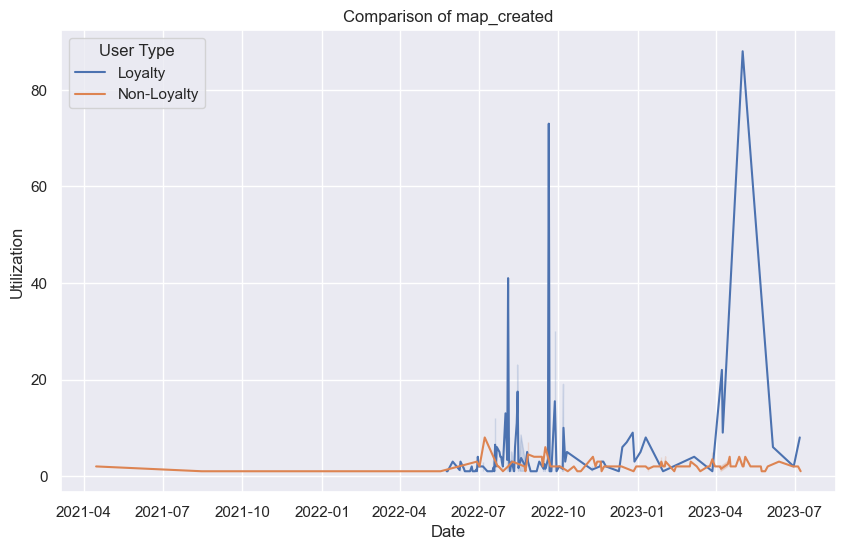

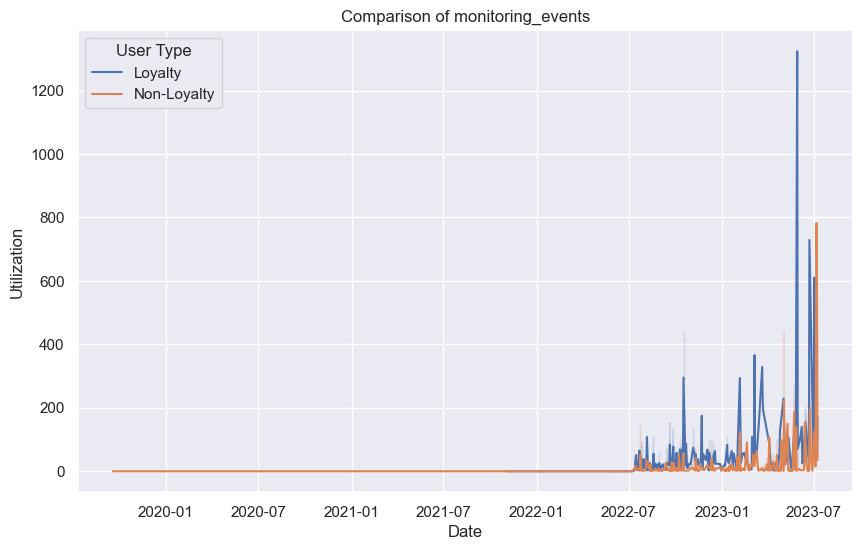

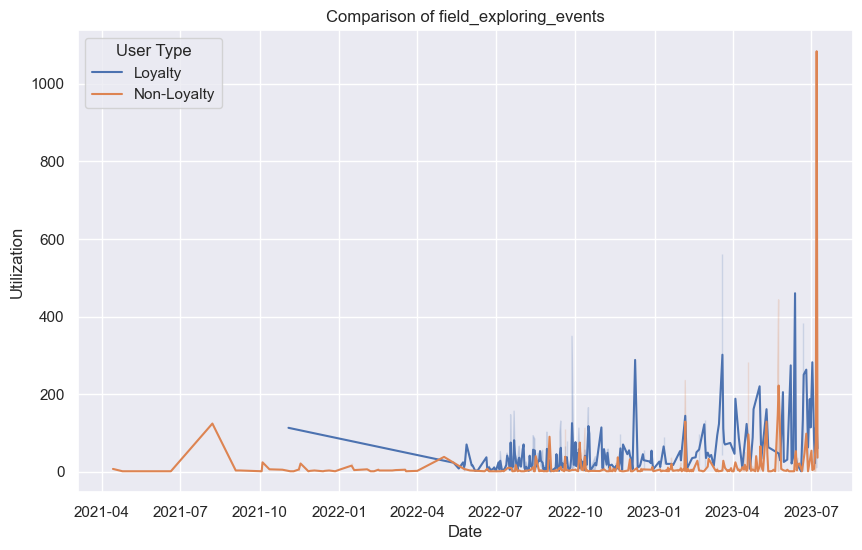

In [320]:
# Plot the comparison using seaborn line plots
utilization_cols = ['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']
for col in utilization_cols:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=combined_data, x=col + '_last_date', y=col, hue='user_type')
    plt.title('Comparison of ' + col)
    plt.xlabel('Date')
    plt.ylabel('Utilization')
    plt.legend(title='User Type')
    plt.show()

In [321]:
loyalty_churn = loyalty.copy()
nonloyalty_churn = nonloyalty.copy()

loyalty_churn['churn_date'] = loyalty_churn.loc[loyalty_churn.active_users == False, ['last_event_date']]
nonloyalty_churn['churn_date'] = nonloyalty_churn.loc[nonloyalty_churn.active_users == False, ['last_event_date']]

loyalty_churn['days_to_churn'] = (loyalty_churn.loc[loyalty_churn.active_users == False, 'churn_date'] - loyalty_churn.loc[loyalty_churn.active_users == False, 'user_reg_date']).dt.days
nonloyalty_churn['days_to_churn'] = (nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'churn_date'] - nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'user_reg_date']).dt.days

<Figure size 800x600 with 0 Axes>

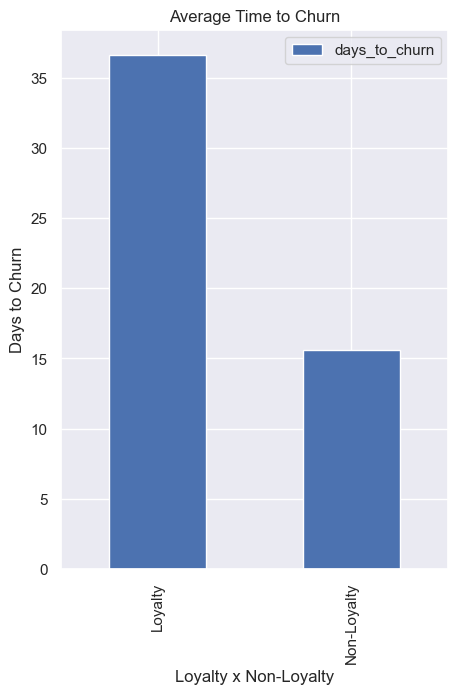

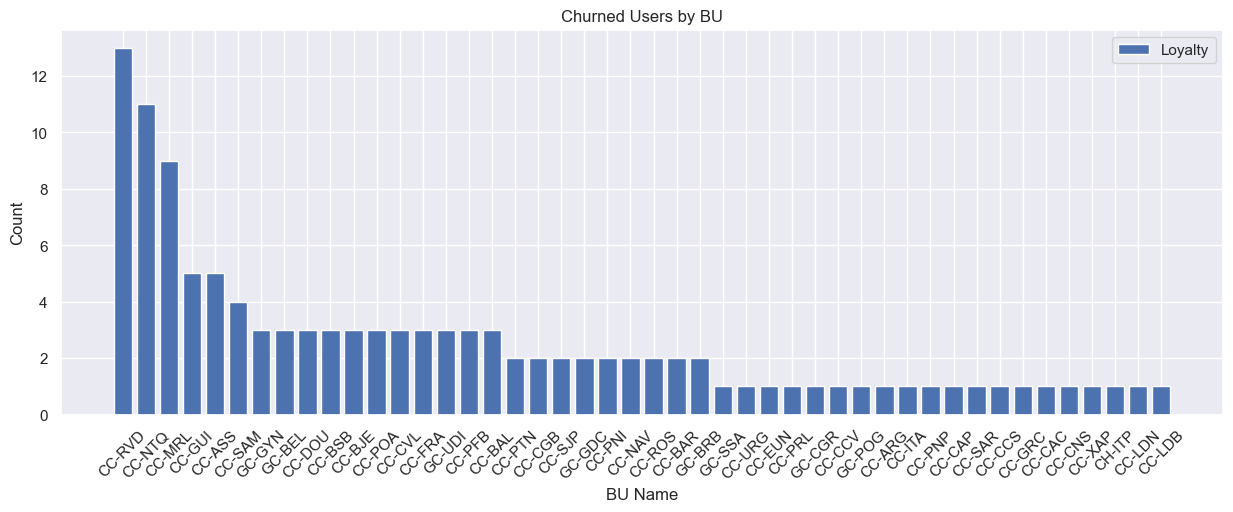

In [322]:
# create new datasets specific for churn
nonloyalty_churn = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == False)].copy()
loyalty_churn = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == True)].copy()

# create churn_date column
loyalty_churn['churn_date'] = loyalty_churn.loc[loyalty_churn.active_users == False, 'last_event_date']
nonloyalty_churn['churn_date'] = nonloyalty_churn.loc[nonloyalty_churn.active_users == False, 'last_event_date']

# Calculate churn rate
loyalty_churn_rate = loyalty_churn['active_users'].value_counts(normalize=True)[False]
nonloyalty_churn_rate = nonloyalty_churn['active_users'].value_counts(normalize=True)[False]

# Analyze time to churn
loyalty_time_to_churn = (loyalty_churn.loc[loyalty_churn.active_users == False, 'churn_date'] - loyalty_churn.loc[loyalty_churn.active_users == False, 'user_reg_date']).dt.days
nonloyalty_time_to_churn = (nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'churn_date'] - nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'user_reg_date']).dt.days 

loyalty_time_to_churn = loyalty_time_to_churn.to_frame(name="days_to_churn")
loyalty_time_to_churn['profile'] = 'Loyalty' 

nonloyalty_time_to_churn = nonloyalty_time_to_churn.to_frame(name="days_to_churn")
nonloyalty_time_to_churn['profile'] = 'Non-Loyalty' 

time_to_churn = pd.concat([loyalty_time_to_churn, nonloyalty_time_to_churn]).groupby('profile').mean().reset_index()

# Plot histogram of time to churn
plt.figure(figsize=(8, 6))
time_to_churn.plot(x="profile", y=['days_to_churn'], kind="bar")
plt.title('Average Time to Churn')
plt.xlabel('Loyalty x Non-Loyalty')
plt.ylabel('Days to Churn')
plt.legend()
plt.show()

# Analyze churned user characteristics
loyalty_churned_users = loyalty_churn[loyalty_churn['active_users'] == False]
nonloyalty_churned_users = nonloyalty_churn[nonloyalty_churn['active_users'] == False]
loyalty_churned_counts = loyalty_churned_users['bu_name'].value_counts()
nonloyalty_churned_counts = nonloyalty_churned_users['bu_name'].value_counts()

# Plot bar chart of churned users by BU
plt.figure(figsize=(15, 5))
plt.bar(loyalty_churned_counts.index, loyalty_churned_counts.values, label='Loyalty')
plt.title('Churned Users by BU')
plt.xlabel('BU Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [323]:
users = case_dataset_prepared.copy()

# Agrupe os dados e calcule a contagem para cada combinação de 'bu_name' e 'active_users'
grouped_data = users.loc[(users.loyalty == True), ['bu_name', 'id', 'active_users']].groupby(['bu_name', 'active_users']).count().reset_index()
grouped_data['active_users'] = grouped_data.active_users * 1

# Reorganize os dados em formato adequado para o gráfico de barras empilhadas
stacked_data = grouped_data.pivot(index='bu_name', columns='active_users', values='id') 

# Ordene os valores pela coluna com os totais
stacked_data['Total'] = stacked_data.sum(axis=1)
stacked_data = stacked_data.sort_values(by='Total', ascending=False)
stacked_data


active_users,0,1,Total
bu_name,,,
CC-GUI,5.00,44.00,49.00
CC-NTQ,11.00,16.00,27.00
CC-CPM,NaN,23.00,23.00
CC-PFB,3.00,17.00,20.00
CC-RVD,13.00,7.00,20.00
...,...,...,...
CC-SOR,NaN,1.00,1.00
CC-PNP,1.00,NaN,1.00
CC-CNF,NaN,1.00,1.00


In [324]:
# create new datasets specific for churn
nonloyalty_churn = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == False)].copy()
loyalty_churn = case_dataset_prepared.loc[(case_dataset_prepared.loyalty == True)].copy()

# create churn_date column
loyalty_churn['churn_date'] = loyalty_churn.loc[loyalty_churn.active_users == False, 'last_event_date']
nonloyalty_churn['churn_date'] = nonloyalty_churn.loc[nonloyalty_churn.active_users == False, 'last_event_date']

# create the column days to churn
loyalty_churn['days_to_churn'] = (loyalty_churn.loc[loyalty_churn.active_users == False, 'churn_date'] - loyalty_churn.loc[loyalty_churn.active_users == False, 'user_reg_date']).dt.days
nonloyalty_churn['days_to_churn'] = (nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'churn_date'] - nonloyalty_churn.loc[nonloyalty_churn.active_users == False,'user_reg_date']).dt.days

# Churn Rate Comparison
loyalty_churn_rate = loyalty_churn['active_users'].value_counts(normalize=True)[False]
nonloyalty_churn_rate = nonloyalty_churn['active_users'].value_counts(normalize=True)[False]
print("Churn Rate Comparison:")
print("Loyalty Churn Rate: {:.2f}%".format(loyalty_churn_rate * 100))
print("Non-Loyalty Churn Rate: {:.2f}%".format(nonloyalty_churn_rate * 100))
print("Loyalty users churn rate is {:.2f}% less than Non-Loyalty users.".format(abs((loyalty_churn_rate - nonloyalty_churn_rate) * 100)))

# Time to Churn Comparison
loyalty_avg_time_to_churn = loyalty_churn.loc[loyalty_churn.active_users == False, 'days_to_churn'].mean()
nonloyalty_avg_time_to_churn = nonloyalty_churn.loc[nonloyalty_churn.active_users == False, 'days_to_churn'].mean()
print("\nTime to Churn Comparison (Average):")
print("Loyalty Average Time to Churn: {:.2f} days".format(loyalty_avg_time_to_churn))
print("Non-Loyalty Average Time to Churn: {:.2f} days".format(nonloyalty_avg_time_to_churn))
print("Loyalty users takes {:.0f} more days, which is {:.1f}x more than Non-Loyalty users.".format(round(loyalty_avg_time_to_churn - nonloyalty_avg_time_to_churn, 0), (loyalty_avg_time_to_churn / nonloyalty_avg_time_to_churn)))

# Retention Analysis
loyalty_retention_rate = loyalty_churn['active_users'].value_counts(normalize=True)[True]
nonloyalty_retention_rate = nonloyalty_churn['active_users'].value_counts(normalize=True)[True]
print("\nRetention Rate Comparison:")
print("Loyalty Retention Rate: {:.2f}%".format(loyalty_retention_rate * 100))
print("Non-Loyalty Retention Rate: {:.2f}%".format(nonloyalty_retention_rate * 100))
print("The retention rate for a Loyalty user is {:.1f}% higher compared to Non-Loyalty users.".format((loyalty_retention_rate - nonloyalty_retention_rate) * 100))

Churn Rate Comparison:
Loyalty Churn Rate: 22.52%
Non-Loyalty Churn Rate: 48.65%
Loyalty users churn rate is 26.13% less than Non-Loyalty users.

Time to Churn Comparison (Average):
Loyalty Average Time to Churn: 36.61 days
Non-Loyalty Average Time to Churn: 15.62 days
Loyalty users takes 21 more days, which is 2.3x more than Non-Loyalty users.

Retention Rate Comparison:
Loyalty Retention Rate: 77.48%
Non-Loyalty Retention Rate: 51.35%
The retention rate for a Loyalty user is 26.1% higher compared to Non-Loyalty users.


In [325]:
# Select relevant columns for churn reasons analysis
churn_reasons_cols = ['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']

# Filter churned and retained users separately
loyalty_churned_users = loyalty_churn.loc[loyalty_churn['active_users'] == False]
loyalty_retained_users = loyalty_churn.loc[loyalty_churn['active_users'] == True]

nonloyalty_churned_users = nonloyalty_churn.loc[nonloyalty_churn['active_users'] == False]
nonloyalty_retained_users = nonloyalty_churn.loc[nonloyalty_churn['active_users'] == True]

# Perform further analysis on churn reasons compared to non-churn users
for col in churn_reasons_cols:
    loyalty_churned_mean = loyalty_churned_users[col].mean()
    loyalty_retained_mean = loyalty_retained_users[col].mean()
    nonloyalty_churned_mean = nonloyalty_churned_users[col].mean()
    nonloyalty_retained_mean = nonloyalty_retained_users[col].mean()

    print(f"\nChurn Reasons Analysis: {col}")
    print("Loyalty Churned Users Mean: {:.2f}".format(loyalty_churned_mean))
    print("Loyalty Retained Users Mean: {:.2f}".format(loyalty_retained_mean))
    print("Non-Loyalty Churned Users Mean: {:.2f}".format(nonloyalty_churned_mean))
    print("Non-Loyalty Retained Users Mean: {:.2f}".format(nonloyalty_retained_mean))
    print("Loyalty users that didn't churn uses the feature {} {:.2f}x more than the users that churned. For Non-Loyalty users it is {:.2f}x higher".format(col, (loyalty_retained_mean / loyalty_churned_mean), (nonloyalty_retained_mean / nonloyalty_churned_mean)))


Churn Reasons Analysis: recommendation_generated
Loyalty Churned Users Mean: 0.05
Loyalty Retained Users Mean: 0.12
Non-Loyalty Churned Users Mean: 0.00
Non-Loyalty Retained Users Mean: 0.00
Loyalty users that didn't churn uses the feature recommendation_generated 2.33x more than the users that churned. For Non-Loyalty users it is 2.13x higher

Churn Reasons Analysis: map_created
Loyalty Churned Users Mean: 0.25
Loyalty Retained Users Mean: 1.61
Non-Loyalty Churned Users Mean: 0.00
Non-Loyalty Retained Users Mean: 0.05
Loyalty users that didn't churn uses the feature map_created 6.55x more than the users that churned. For Non-Loyalty users it is 34.42x higher

Churn Reasons Analysis: monitoring_events
Loyalty Churned Users Mean: 0.93
Loyalty Retained Users Mean: 34.28
Non-Loyalty Churned Users Mean: 0.00
Non-Loyalty Retained Users Mean: 1.54
Loyalty users that didn't churn uses the feature monitoring_events 36.77x more than the users that churned. For Non-Loyalty users it is infx high

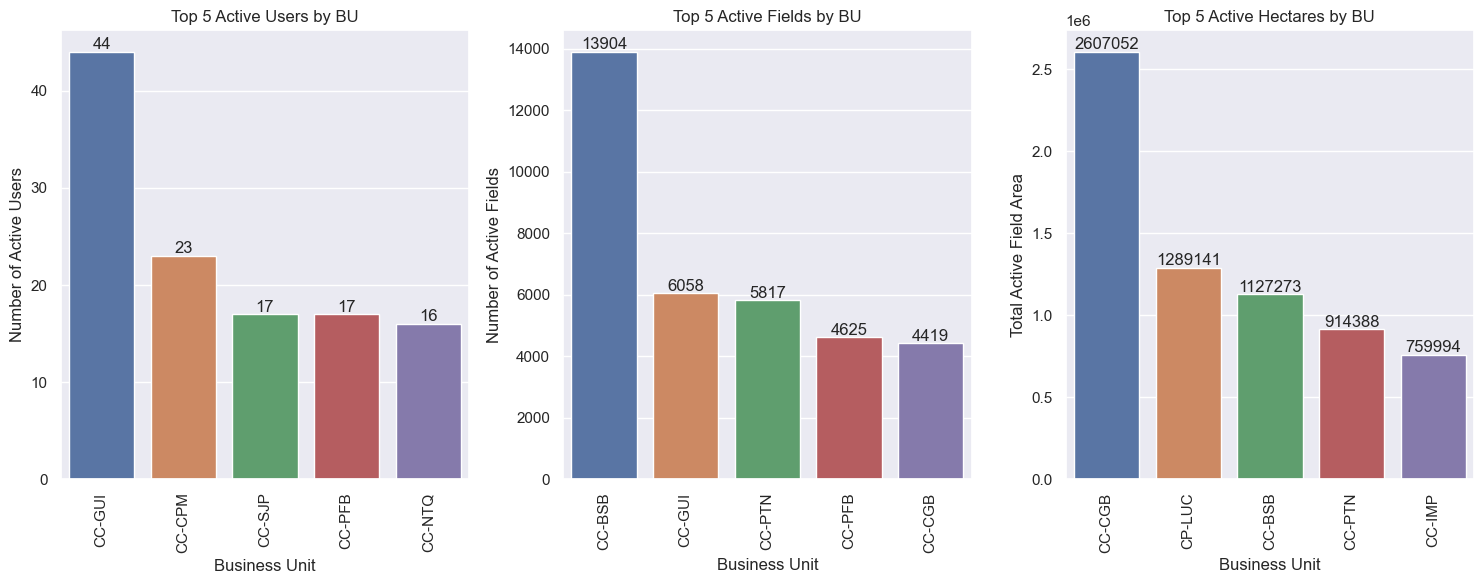

In [338]:
# Convert 'active_users' column to numeric type
case_dataset_prepared['active_users'] = pd.to_numeric(case_dataset_prepared['active_users'])

# Group the data by BU and calculate the sum of the main KPIs
kpi_cols = ['active_users', 'n_active_fields', 'total_active_field_area']
utilization_cols = ['recommendation_generated', 'map_created', 'monitoring_events', 'field_exploring_events']

# Create an empty dataframe to store the top 5 results
top5_data = pd.DataFrame()

# Sort each KPI within each BU and select the top 5 for each KPI
for kpi_col in kpi_cols:
    sorted_data = case_dataset_prepared.groupby('bu_name')[kpi_col].sum().reset_index().sort_values(by=kpi_col, ascending=False).head()
    top5_data = pd.concat([top5_data, sorted_data])

# Plot the comparison using seaborn
plt.figure(figsize=(15, 6))

# Main KPIs Comparison
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=top5_data.loc[top5_data.active_users.notna()], x='bu_name', y='active_users')
plt.title('Top 5 Active Users by BU')
plt.xlabel('Business Unit')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=90)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=top5_data.loc[top5_data.n_active_fields.notna()], x='bu_name', y='n_active_fields')
plt.title('Top 5 Active Fields by BU')
plt.xlabel('Business Unit')
plt.ylabel('Number of Active Fields')
plt.xticks(rotation=90)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=top5_data.loc[top5_data.total_active_field_area.notna()], x='bu_name', y='total_active_field_area')
plt.title('Top 5 Active Hectares by BU')
plt.xlabel('Business Unit')
plt.ylabel('Total Active Field Area')
plt.xticks(rotation=90)

for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

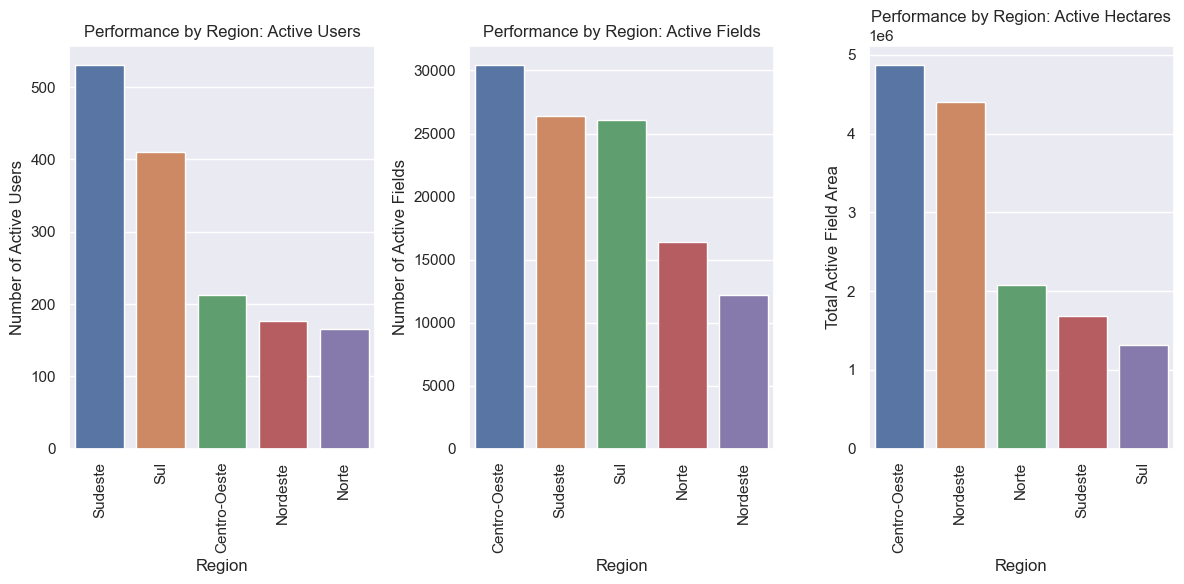

In [340]:

# Filter the dataset to exclude rows with missing region/state values
filtered_data = case_dataset_prepared.dropna(subset=['region', 'state'])

# Group the data by region/state and calculate the sum of the main KPIs
kpi_cols = ['active_users', 'n_active_fields', 'total_active_field_area']
region_data = filtered_data.groupby('region')[kpi_cols].sum().reset_index()

# Plot the performance comparison using seaborn
plt.figure(figsize=(12, 6))

# Active Users Comparison
plt.subplot(1, 3, 1)
sns.barplot(data=region_data.sort_values('active_users', ascending=False), x='region', y='active_users')
plt.title('Performance by Region: Active Users')
plt.xlabel('Region')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=90)

# Active Fields Comparison
plt.subplot(1, 3, 2)
sns.barplot(data=region_data.sort_values('n_active_fields', ascending=False), x='region', y='n_active_fields')
plt.title('Performance by Region: Active Fields')
plt.xlabel('Region')
plt.ylabel('Number of Active Fields')
plt.xticks(rotation=90)

# Active Hectares Comparison
plt.subplot(1, 3, 3)
sns.barplot(data=region_data.sort_values('total_active_field_area', ascending=False), x='region', y='total_active_field_area')
plt.title('Performance by Region: Active Hectares')
plt.xlabel('Region')
plt.ylabel('Total Active Field Area')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

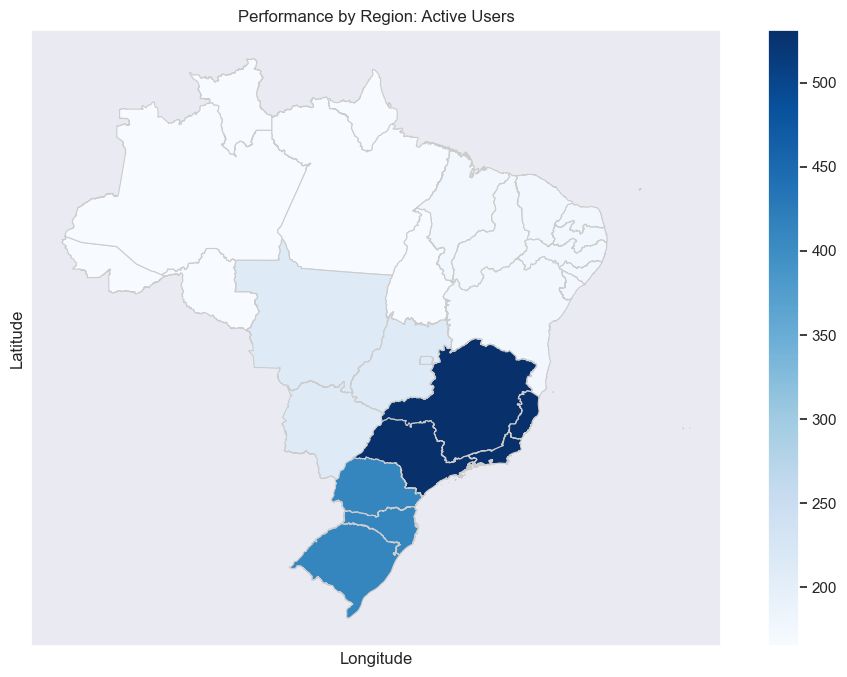

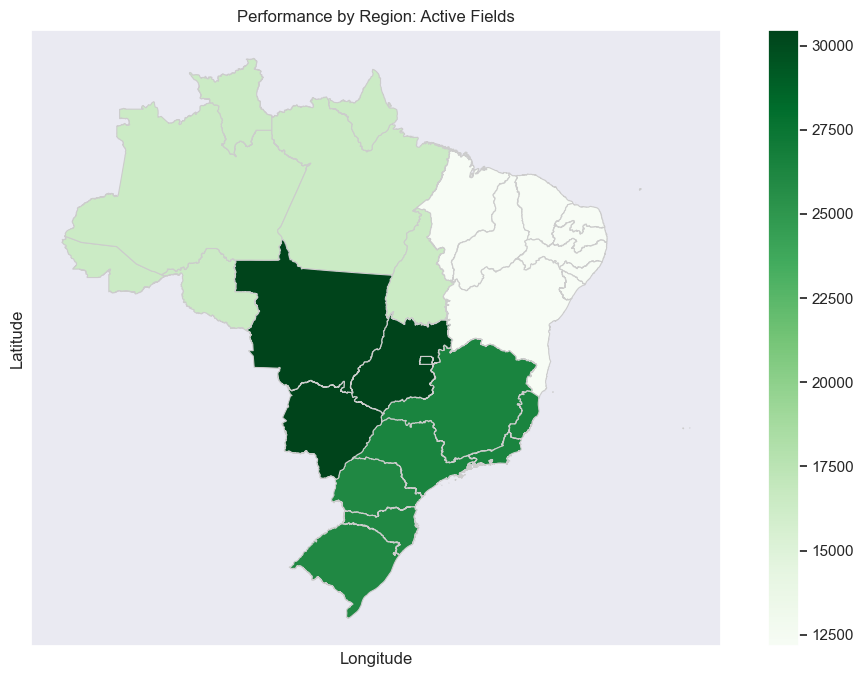

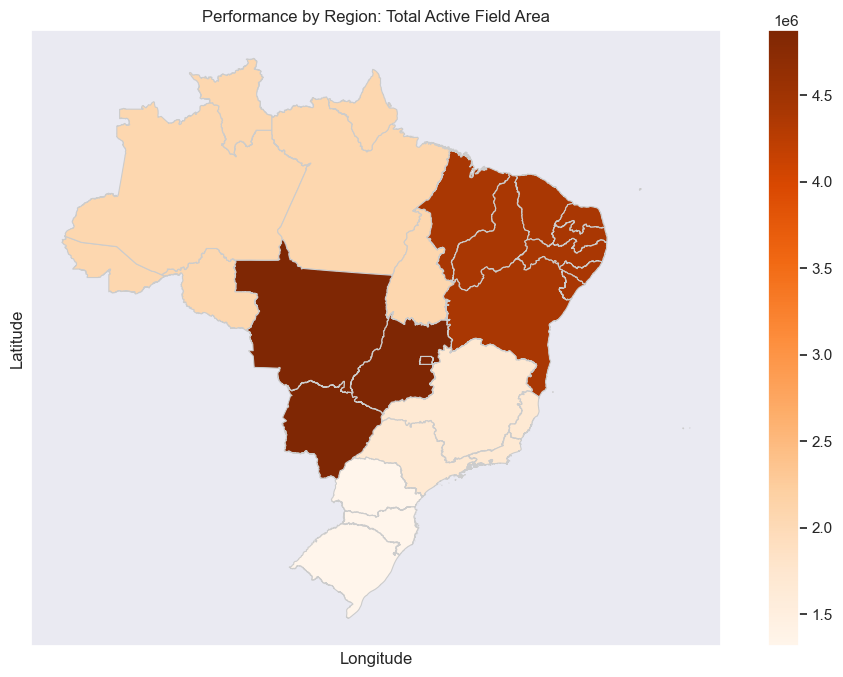

In [362]:
# Filter the dataset to exclude rows with missing region/state values
filtered_data = case_dataset_prepared.dropna(subset=['region', 'state'])

# Group the data by region/state and calculate the sum of the main KPIs
kpi_cols = ['active_users', 'n_active_fields', 'total_active_field_area']
region_data = filtered_data.groupby('region')[kpi_cols].sum().reset_index()

# Load the shapefile of Brazil's regions
brazil_regions = gpd.read_file('BR_UF_2021.shp')

brazil_regions.loc[brazil_regions['NM_REGIAO'] == "Centro-oeste", 'NM_REGIAO'] = "Centro-Oeste"

# Merge the performance data with the shapefile data
merged_data_users = brazil_regions.merge(region_data[['region', 'active_users']], left_on='NM_REGIAO', right_on='region', how='left')
merged_data_fields = brazil_regions.merge(region_data[['region', 'n_active_fields']], left_on='NM_REGIAO', right_on='region', how='left')
merged_data_area = brazil_regions.merge(region_data[['region', 'total_active_field_area']], left_on='NM_REGIAO', right_on='region', how='left')

# Plot the performance on a map of Brazil (Active Users)
fig, ax = plt.subplots(figsize=(12, 8))
merged_data_users.plot(column='active_users', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Performance by Region: Active Users')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()


# Plot the performance on a map of Brazil (Active Fields)
fig, ax = plt.subplots(figsize=(12, 8))
merged_data_fields.plot(column='n_active_fields', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Performance by Region: Active Fields')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()


# Plot the performance on a map of Brazil (Total Active Field Area)
fig, ax = plt.subplots(figsize=(12, 8))
merged_data_area.plot(column='total_active_field_area', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Performance by Region: Total Active Field Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()